In [31]:
import sys
import time
from Env.simUtils import *

import grpc

host = '127.0.0.1:30001'
scene_num = 1
map_id = 2
server = SimServer(host,scene_num = scene_num, map_id = map_id)
sim=SimAction(host,scene_id=0)

In [69]:
scene=sim.removeObjects()

In [70]:
sim.addDesk(1)

In [71]:
sim.genObjs(n=1,ids=16,h=sim.desk_height,handSide='Right')

[[16, -49.952392272425165, -18.459125332218264, 99, 0, 0, 0, 0.9, 0.9, 0.9]]

In [74]:
import matplotlib.pyplot as plt
import numpy as np
caremras=[GrabSim_pb2.CameraName.Head_Segment]
ignore = np.array([0,128])
mat=sim.getImage(caremras)
assert not (mat==ignore[0]).any() or not (mat==ignore[1]).any(), 'mask may have been changed'
# unique_values = np.unique( caremras)

AssertionError: mask may have been changed

In [75]:
(mat==ignore[0]).any()

array([[[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       ...,

       [[128],
        [128],
        [128],
        ...,
        [128],
        [128],
        [128]],

       [[128],
        [128],
        [128],
        ...,
        [128],
        [128],
        [128]],

       [[128],
        [128],
        [128],
        ...,
        [128],
        [128],
        [128]]], dtype=uint8)

In [72]:
caremras=[GrabSim_pb2.CameraName.Head_Segment]
mat=sim.getImage(caremras)

In [73]:
np.unique( mat.ravel())

array([  0,   9, 128], dtype=uint8)

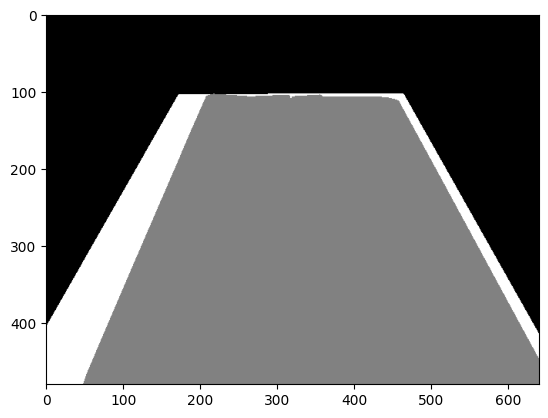

In [68]:
plt.imshow(mat,cmap='gray')
plt.show()

In [55]:
mat.shape

(480, 640, 1)

In [45]:
unique_valus

array([1027])

In [ ]:
joints = [0]*21
# 36.0, -40.0, 40.0, -90.0, 5.0
joints[-7]=36
joints[-6]=-40
joints[-5]=40
joints[-4]=-90
action = GrabSim_pb2.Action(scene=0, action=GrabSim_pb2.Action.ActionType.RotateJoints, values=joints)
message = server.sim_client.Do(action)

In [ ]:
handSide='Right'
objs=[]
ids=[23,12]
objs_loc = generate_points_in_square(2,sim.target_range[handSide],sim.obj_range)
# assert len(objs_loc)==n, 'generated obj number less than needed'
for id,loc in zip(ids,objs_loc):
    objs.append([id,loc[0],loc[1],sim.desk_height+1,0,0,0])
objs[0]+=[1,1,1]
scene=sim.addObjects(objs,location='relatively')

In [ ]:
sim.registry_objs

[None,
 ([79.93091583251953, -6.516443729400635, 107.5], 9.5),
 ([70.81513977050781, -19.07782554626465, 104.76000213623047],
  6.760002136230469)]

In [ ]:
for action in sim.graspTargetObj(1,handSide=handSide):
    print(action)

In [ ]:
sim.addDesk(0,h=98)
sim.genObjs(n=1,ids=21)

[[21, -35.515519503881606, 0.20993370291152758, 91, 0, 0, 0, 1, 1, 1]]

In [ ]:
sim.initState()

In [ ]:
sim.getActuators()

array([-1.93231013e-02, -9.72418900e+01,  3.47298455e+00,  1.10487856e-01,
        1.09054886e-01,  1.14364848e-01,  1.07733972e-01, -5.23531227e+01,
        2.18624554e+01,  3.31822746e-02,  8.24994445e-02, -2.19020080e-02,
       -1.86436065e-03, -4.68058527e-01,  6.44119456e-02,  1.78142592e-01,
        3.55328827e+01, -4.16607218e-04, -1.87331636e-03, -9.86356964e+01,
       -2.03312588e+00, -5.72957850e+00, -5.72957850e+00, -5.72957802e+00,
       -5.72957850e+00, -5.13900146e+01, -2.02540779e+01, -5.72957850e+00,
        3.00003681e+01, -5.12255764e+00, -2.58070774e+01])

In [ ]:
sim.bow_head()

array([ 4.77197500e-06, -9.88900604e+01,  4.87631130e+00, -2.97053647e+00,
       -3.30658269e+00, -3.21994472e+00, -3.31820560e+00, -5.18201370e+01,
        2.05184231e+01, -5.67035103e+00,  3.00003109e+01,  6.81182146e+00,
        2.23985291e+01, -6.93456054e-01,  1.25737593e-01, -3.67542985e-03,
        3.50000000e+01,  4.01720032e-03, -7.13843340e-03, -1.00429947e+02,
       -4.01931143e+00, -5.21705389e+00, -5.42529583e+00, -5.42487383e+00,
       -5.42526245e+00, -5.10496826e+01, -2.04081345e+01, -5.51246071e+00,
        3.00003586e+01, -5.12636852e+00, -2.58006687e+01])

In [63]:
import numpy as np
success_num = 0
np.random.seed(42)
can_list = sim.can_list
handSide = 'Right'
for _,id in enumerate(can_list[:1]):
    sim.reset()
    paths = [[*sim.getSensorsData(handSide=handSide)[0],0]]
    sim.addDesk(random.choice(list(sim.desks.ID.values)),h=98)
    n_objs = 2
    ids = random.sample(list(can_list),n_objs)
    objs=sim.genObjs(n=n_objs,ids=ids,h=sim.desk_height,handSide=handSide)
    for action in sim.graspTargetObj(obj_id=1,handSide=handSide):
        path = sim.getSensorsData(handSide=handSide)[0]
        paths.append([*path,action[-1]])

In [64]:
sim.clearObjs()

In [65]:
sim.initState()

In [51]:
sim.getSensorsData(handSide=handSide)[0]

[90.5694580078125, -18.296417236328125, 131.56790161132812]

In [66]:
scene=sim.addObjects(objs)

In [67]:
paths[0][:-1]

[89.86419677734375, -19.757461547851562, 131.79888916015625]

In [68]:
for path in paths:
    print('path',path)
    sim.moveHand(*path[:-1],handSide=handSide,gap=0.3,keep_rpy=(0,0,0),method='absolute')
    if path[-1]==1 and sim.grasp_state[handSide]==0:
        sim.grasp(handSide=handSide)

path [89.86419677734375, -19.757461547851562, 131.79888916015625, 0]
path [89.85104370117188, -19.527786254882812, 131.2212677001953, 0]
path [89.84231567382812, -19.266128540039062, 130.58106994628906, 0]
path [89.8385009765625, -19.00811767578125, 129.9855499267578, 0]
path [89.82968139648438, -18.700759887695312, 129.29547119140625, 0]
path [89.83349609375, -18.425857543945312, 128.67141723632812, 0]
path [89.83837890625, -18.16326904296875, 128.07550048828125, 0]
path [89.840576171875, -17.846908569335938, 127.38143157958984, 0]
path [89.85226440429688, -17.508468627929688, 126.65766906738281, 0]
path [89.87091064453125, -17.209625244140625, 126.02386474609375, 0]
path [89.88897705078125, -16.871612548828125, 125.31624603271484, 0]
path [89.91549682617188, -16.514480590820312, 124.59062957763672, 0]
path [89.94671630859375, -16.1915283203125, 123.94934844970703, 0]
path [89.97671508789062, -15.895904541015625, 123.37130737304688, 0]
path [90.010498046875, -15.597686767578125, 122.8

In [73]:
paths = np.array(paths)
path = paths[:,:3].copy()
last_waypoint = path[-1].copy()

In [74]:
from scipy.signal import savgol_filter
def calc_curvature(path):
    dx = np.gradient(path[:, 0])
    dy = np.gradient(path[:, 1])
    dz = np.gradient(path[:, 2])
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    ddz = np.gradient(dz)
    curvature = np.sqrt((ddy * dx - ddx * dy)**2 + (ddz * dx - ddx * dz)**2 + (ddz * dy - ddy * dz)**2) / np.power(dx**2 + dy**2 + dz**2, 3/2)
    # convert any nan to 0
    curvature[np.isnan(curvature)] = 0
    return curvature

# smooth the path
savgol_window_size = 15
max_curvature = 3
savgol_window_size = min(len(path), savgol_window_size)
savgol_polyorder = min(2, savgol_window_size - 1)
last_waypoint = path[-1].copy()
path = savgol_filter(path, savgol_window_size, savgol_polyorder, axis=0)
# early cutoff if curvature is too high
curvature = calc_curvature(path)
if len(curvature) > 5:
    high_curvature_idx = np.where(curvature[5:] > max_curvature)[0]
    if len(high_curvature_idx) > 0:
        high_curvature_idx += 5
        path = path[:int(0.9 * high_curvature_idx[0])] 
# force last position to be one of the target positions
if np.linalg.norm(last_waypoint-path[-1])>0.5:
    path = np.append(path, [last_waypoint], axis=0)

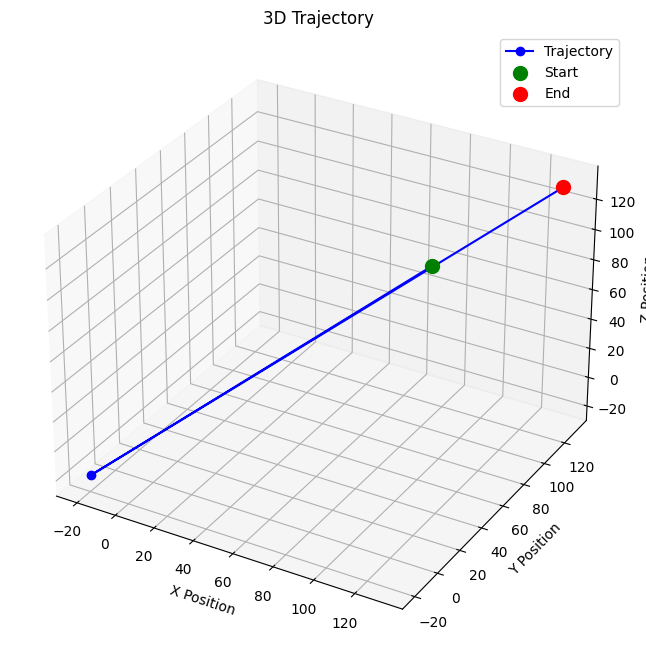

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_track(path):
    # 随机生成一个三维轨迹示例
    np.random.seed(0)
    path_length = len(path)
    path_x = path[0]
    path_y = path[1]
    path_z = path[2]

    # 创建3D图形
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制轨迹
    ax.plot(path_x, path_y, path_z, marker='o', linestyle='-', color='b', label='Trajectory')
    ax.scatter(path_x[0], path_y[0], path_z[0], color='green', s=100, label='Start', zorder=5)
    ax.scatter(path_x[-1], path_y[-1], path_z[-1], color='red', s=100, label='End', zorder=5)

    # 设置图形属性
    ax.set_title('3D Trajectory')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.legend()

    # 显示图形
    plt.show()

draw_track(path)
draw_track

In [9]:
b

array([10, 23])

In [6]:
sim.getSensorsData(handSide)[0]

[89.70074462890625, -19.781997680664062, 131.59878540039062]

In [23]:
sim.initState()

In [24]:
import time
sensor = sim.getSensorsData(handSide='All',type='full')
middle = np.array(sensor[-10]['data'])
for path in paths:
    sim.moveHand(*path[3:6],handSide=handSide,gap=0.3,keep_rpy=(0,0,0))
    middle+=path[3:6]
    if path[-1]==1 and sim.grasp_state['Right']!=1:
        sim.grasp(handSide=handSide)
        time.sleep(1)
    print(middle,sim.getSensorsData(handSide='All',type='full')[-10]['data'])

[ 76.61317706 -10.31373027 136.65644101] [75.97540283203125, -12.609725952148438, 137.0804443359375]
[ 76.61661292  -9.94021994 135.72882136] [75.6527099609375, -14.242950439453125, 136.33111572265625]
[ 76.62004877  -9.5667096  134.8012017 ] [75.44976806640625, -12.945770263671875, 134.93746948242188]
[ 76.62348462  -9.19319927 133.87358204] [75.29412841796875, -12.485687255859375, 133.85760498046875]
[ 76.62692047  -8.81968894 132.94596239] [75.12628173828125, -12.965713500976562, 133.20294189453125]
[ 76.63035632  -8.44617861 132.01834273] [75.01910400390625, -13.13140869140625, 132.6241912841797]
[ 76.63379218  -8.07266828 131.09072307] [74.90524291992188, -12.888214111328125, 131.8514862060547]
[ 76.63722803  -7.69915794 130.16310342] [74.8316650390625, -12.787689208984375, 131.33114624023438]
[ 76.64066388  -7.32564761 129.23548376] [74.70458984375, -12.758865356445312, 130.4490509033203]
[ 76.64409973  -6.95213728 128.30786411] [74.59747314453125, -12.657485961914062, 129.604431

In [26]:
obj_loc=np.array(sim.findObj(id=1)['location'])
obj_loc[0]-=4+2
obj_loc[1]-=2-1
# obj_loc[2]-=1
obj_loc[2] = sim.desk_height+5.5
obj_loc

array([ 65.6246109 ,   5.27856731, 103.5       ])

In [22]:
sim.getSensorsData(handSide='All',type='full')[-10]['data']

[77.1898193359375, 1.0777587890625, 108.77173614501953]

In [20]:
middle

array([66.69696045, 23.09509563, 68.35325623])

In [ ]:
jointInOrder = ['knee', 'lumbar_yaw', 'lumbar_pitch','lumbar_roll', 'neck_yaw', 'neck_pitch', 'neck_roll', 'left_shoulder_pitch', 'left_shoulder_roll',
  'left_elbow_yaw', 'left_elbow_pitch', 'left_wrist_yaw', 'left_wrist_pitch', 'left_wrist_roll', 'right_shoulder_pitch',
  'right_shoulder_roll', 'right_elbow_yaw', 'right_elbow_pitch', 'right_wrist_yaw', 'right_wrist_pitch', 'right_wrist_roll', 
  'left_thumb', 'left_index', 'left_middle', 'left_ring', 'left_pinky', 'right_thumb', 'right_index', 'right_middle', 'right_ring', 'right_pinky']

In [2]:
sim.addDesk(0,98)

In [10]:
sim.initState()

In [4]:
scene=sim.removeObjects([1])

In [5]:
handSide='Left'
objs=[]
ids=[22]
objs_loc = generate_points_in_square(1,sim.target_range[handSide],sim.obj_range)
# assert len(objs_loc)==n, 'generated obj number less than needed'
for id,loc in zip(ids,objs_loc):
    objs.append([id,-46.11830028-12,-3.43694289,sim.desk_height+1,0,0,-90,0.2,0.2,0.2])
scene=sim.addObjects(objs,location='relatively')
sim.sim_client.SetObjectJointAngle(GrabSim_pb2.ObjectJointCtrl(scene=0,objectId=1,jointName="joint_door",angle=-90))

In [6]:
for action in sim.closeDoor(obj_id=1):
    print(action)

[-0.021738955849102126, -0.03243788919950674, -0.9670203359503375, 0, 0, 0, 0, 0]
[-0.01686658357319004, -0.03356474324276704, -0.996952659205391, 0, 0, 0, 0, 0]
[-0.03720173082854217, -0.06549909240321128, -1.945525119179166, 0, 0, 0, 0, 0]
[-0.020641126130755083, -0.08385311929803052, -2.4673092490748303, 0, 0, 0, 0, 0]
[-0.01482270893298221, -0.036212883497540815, -1.0708499707673695, 0, 0, 0, 0, 0]
[-0.036500629625820125, -0.06656031859548506, -1.9609812686317838, 0, 0, 0, 0, 0]
[-0.03037703664679725, -0.0885001609199918, -2.6014330010665105, 0, 0, 0, 0, 0]
[-0.015800074527135166, -0.034985291330439594, -1.0363869918020185, 0, 0, 0, 0, 0]
[-0.03863766318873729, -0.06598885435807134, -1.952282754998464, 0, 0, 0, 0, 0]
[-0.03504702919407521, -0.08493797402632808, -2.461646230597239, 0, 0, 0, 0, 0]
[-0.018639012386927334, -0.03487159076489732, -1.0286879288522783, 0, 0, 0, 0, 0]
[-0.04144608347039025, -0.06618032957378261, -1.9557836432205988, 0, 0, 0, 0, 0]
[-0.046095195569492375, -0

In [28]:
sim.moveHand(0,10,0,handSide='Left')

In [ ]:
sim.checkCloseDoor(1)

False

In [ ]:
sim.getObservation()

location {
  X: 116.54253387451172
}
rotation {
  Yaw: 180.0
}
joints {
  name: "joint_knee"
  angle: 0.002824622206389904
}
joints {
  name: "joint_left_elbow_pitch"
  angle: -76.44937896728516
}
joints {
  name: "joint_left_elbow_yaw"
  angle: -15.725418090820312
}
joints {
  name: "joint_left_index1"
  angle: -5.150472640991211
}
joints {
  name: "joint_left_index2"
  angle: -5.023436546325684
}
joints {
  name: "joint_left_index3"
  angle: -5.014880180358887
}
joints {
  name: "joint_left_middle1"
  angle: -5.204717636108398
}
joints {
  name: "joint_left_middle2"
  angle: -5.460830211639404
}
joints {
  name: "joint_left_middle3"
  angle: -5.198370456695557
}
joints {
  name: "joint_left_pinky1"
  angle: -5.73148250579834
}
joints {
  name: "joint_left_pinky2"
  angle: -5.731024742126465
}
joints {
  name: "joint_left_pinky3"
  angle: -4.496458053588867
}
joints {
  name: "joint_left_ring1"
  angle: -5.221477508544922
}
joints {
  name: "joint_left_ring2"
  angle: -5.3188939094543

In [ ]:
sim.get

In [ ]:
import pickle
with open('../../tmp/000001.pkl','rb') as f:
    data=pickle.load(f)

In [ ]:
import hashlib
def string_to_seed(input_string):
    hash_object = hashlib.sha256(input_string.encode())
    hex_dig = hash_object.hexdigest()
    # 将哈希值转换为整数
    seed = int(hex_dig, 16)%100000009
    return seed

In [ ]:
string_to_seed('ssss')

87093454

In [ ]:
for frame in data['trajectory']:
    print(frame['action'])

[0, 0, 0, -0.13462923102415997, 0.34098616844861535, -1.0]
[0, 0, 0, -0.12645306224888567, 0.34003531534093534, -1.0]
[0, 0, 0, -0.11619961478587988, 0.35697672733430086, -1.0]
[0, 0, 0, -0.10603254541359797, 0.37720307161716016, -1.0]
[0, 0, 0, -0.0972640536397813, 0.39185074339487846, -1.0]
[0, 0, 0, -0.08882878239188885, 0.4076937288056822, -1.0]
[0, 0, 0, -0.08029414784508832, 0.42698109597609946, -1.0]
[0, 0, 0, -0.07232920122258708, 0.44529278300144653, -1.0]
[0, 0, 0, -0.06486445103195665, 0.46498045931672116, -1.0]
[0, 0, 0, -0.05765594825591709, 0.48880823502708554, -1.0]
[0, 0, 0, -0.051393541354723966, 0.5119535280266475, -1.0]
[0, 0, 0, -0.045647085773279826, 0.5394693010962942, -1.0]
[0, 0, 0, -0.041067641675655776, 0.5665159282357172, -1.0]
[0, 0, 0, -0.03779573374492521, 0.5855477918609712, -1.0]
[0, 0, 0, -0.03651836045667607, 0.5993018498963283, -1.0]
[0, 0, 0, -0.037063308787272264, 0.6149125262431471, -1.0]
[0, 0, 0, -0.03962924454969153, 0.629287720857618, -1.0]
[0,

In [ ]:
GrabSim_pb2.ObjectJointCtrl

In [ ]:
sim.genObjs(n=1,ids=22,h=sim.desk_height)

[[22, -47.65972039336345, -16.100136991594933, 101, 0, 0, 0, 1, 1, 1]]

In [ ]:
success_num = 0
np.random.seed(42)
can_list = sim.can_list
handSide = 'Right'
for _ in range(5):
    sim.reset()
    sim.addDesk(0,h=98)
    n_objs = 1 
    ids = random.sample(can_list,n_objs)
    sim.genObjs(n=n_objs,ids=ids,h=sim.desk_height,handSide=handSide)
    obj_id = 1

    for action in sim.pushLeft(obj_id,handSide=handSide):
        pass
    time.sleep(1)
    if sim.checkPushLeft(obj_id):
        print('success')
        success_num+=1
    print(f'success rate:{success_num}/{_+1}')
    
    # obj1 = sim.getObjsInfo()[1]['location']
    # obj2 = sim.getObjsInfo()[2]['location']
    # if handSide=='Right':
    #     if obj1[1]<obj2[1]:
    #         obj1_id,obj2_id = 1,2
    #     else:
    #         obj1_id,obj2_id = 2,1
    # else:
    #     if obj1[1]>obj2[1]:
    #         obj1_id,obj2_id = 1,2
    #     else:
    #         obj1_id,obj2_id = 2,1


success
success rate:1/1


KeyboardInterrupt: 

In [ ]:
sim.checkKnockOver(obj_id)

True

In [ ]:
obj_loc=np.array(sim.findObj(id=obj_id)['location'])
sim.desk_height+sim.registry_objs[obj_id][1]/2>obj_loc[-1]


True

In [ ]:
initLoc = sim.registry_objs[obj_id][0]
nowLoc = sim.getObjsInfo()[obj_id]['location']
nowLoc[0]-initLoc[0]

-2.81524658203125

In [ ]:
if sim.checkMoveNear(obj1_id=obj1_id,obj2_id=obj2_id):
    print('success')
    success_num+=1

success


In [ ]:
obj1_loc = np.array(sim.getObjsInfo()[obj1_id]['location'])
obj2_loc = np.array(sim.getObjsInfo()[obj2_id]['location'])
np.linalg.norm(obj2_loc-obj1_loc)

7.067946871786117

In [ ]:
sim.registry_objs

[None, None, None, 6.760002136230469]

In [ ]:
success_num = 0
np.random.seed(42)
can_list = sim.can_list
handSide = 'Right'
for _ in range(1):
    sim.reset()
    sim.removeObjects()
    sim.addDesk(0,h=98)
    ids = random.choice(can_list)
    sim.genObjs(n=1,ids=18,h=sim.desk_height,handSide=handSide)
    method='absolute'
    obj_id=1
    gap=1.5
    keep_rpy=(0,0,0)
    time_step=0
    if handSide=='Right':
        target_oringin_loc=sim.getObjsInfo()[1]['location']
        for action in sim.closeTargetObj(1,return_action=True):
            time.sleep(0.1)
            st=time.time()
            mat = sim.getImage()
            # print(action)
            time_step+=1
        sim.grasp()
        for action in sim.moveHandReturnAction(0,0,10,gap=1):
            mat = sim.getImage()
            time.sleep(0.1)
        target_now_loc=sim.getObjsInfo()[1]['location']
        print('time_step:',time_step)
        if target_now_loc[2]-target_oringin_loc[2]>5:
            print('success')
            success_num+=1
        print(f'success rate:{success_num}/{_+1}')
    elif handSide=='Left':
        target_oringin_loc=sim.getObjsInfo()[1]['location']
        obj_loc=np.array(sim.findObj(id=obj_id)['location'])
        obj_loc[0]+=4
        obj_loc[1]+=6
        for i in range(100):  
            time_step+=1
            sensor = sim.getSensorsData(handSide='All',type='full')
            middle = np.array(sensor[-24]['data'])
            p = max(abs(obj_loc-middle))/gap if max(abs(obj_loc-middle))>gap else 1
            vector = (obj_loc-middle)/p
            if max(abs(obj_loc[:2]-middle[:2]))<1 and max(abs(obj_loc[2:]-middle[2:]))<2:
                break
            sim.moveHand(*vector,handSide=handSide,method='diff',gap=gap,keep_rpy=(0,0,0))
        
        obj_loc=np.array(sim.findObj(id=obj_id)['location'])
        obj_loc[0]-=4
        obj_loc[1]+=4
        for i in range(100):
            time_step+=1
            sensor = sim.getSensorsData(handSide='All',type='full')
            middle = np.array(sensor[-24]['data'])
            p = max(abs(obj_loc-middle))/gap if max(abs(obj_loc-middle))>gap else 1
            vector = (obj_loc-middle)/p
            if max(abs(obj_loc[:2]-middle[:2]))<1 and max(abs(obj_loc[2:]-middle[2:]))<2:
                break
            sim.moveHand(*vector,handSide=handSide,method='diff',gap=gap,keep_rpy=(0,0,0))
        sim.grasp(handSide=handSide)
        sim.moveHand(0,0,10,handSide=handSide)
        target_now_loc=sim.getObjsInfo()[1]['location']
        print('time_step:',time_step)
        if target_now_loc[2]-target_oringin_loc[2]>5:
            print('success')


time_step: 38
success
success rate:1/1


In [ ]:
            success_num+=1
        print(f'success rate:{success_num}/{_+1}')

In [ ]:
sim.moveHand(0,0,-8,handSide=handSide)

In [ ]:
sim.moveHand(5,0,0,handSide=handSide)

In [ ]:
sim.release(handSide=handSide)

In [ ]:
np.array(sim.getActuators())[[-4,-10,-9,-8,-7]]

array([ 9.81004047, 12.82505035, 27.38894463, 58.87218475, 17.03774452])

In [ ]:
#!/usr/bin/env python3
# -*- encoding: utf-8 -*-
import sys
import time
import json

sys.path.append('./')
sys.path.append('../')
from src.Env.simUtils import *
import matplotlib.pyplot as plt
# from moviepy.editor import ImageSequenceClip, ImageClip, concatenate_videoclips

import grpc

print('数据生成脚本启动')

host = '127.0.0.1:30001'
scene_num = 1
map_id = 2
server = SimServer(host, scene_num=scene_num, map_id=map_id)

sim = Sim(host, scene_id=0)

import pickle


import os

output_path = '/data2/liangxiwen/zkd/datasets/dataGen/DATA/1_objs'
data_info="使用中指判断位置"
meta_data_path = output_path + os.sep + 'meta_data.json'
n_objs = 1
handSide = 'Right'
can_list = [12, 14, 16, 17, 18]

from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

random.seed(42)


def Resize(mat):
    mat = Image.fromarray(mat, mode='RGB')
    mat = mat.resize((224, 224))
    mat = np.array(mat)
    mat = 1.0 * mat
    mat = mat / 255.0
    return mat


from tqdm import tqdm
collected_num=0
for epoch in range(1):
    print('Epoch:', epoch)
    offline_data = dict()
    for index in tqdm(range(1000)):
        sim.reset()
        sim.bow_head()
        time.sleep(1)
        sim.grasp('release',handSide=handSide)
        time.sleep(1)
        sim.removeObjects('all')
        objs = sim.getObjsInfo()
        scene = sim.removeObjects([0])
        desk_height = 98 # 固定桌子高度
        desk_id = 1
        sim.addDesk(desk_id, h=desk_height)
        obj_id = random.choice(can_list)
        other_obj_ids = random.choices([x for x in sim.objs.ID.values if x != obj_id], k=n_objs - 1)
        ids = [obj_id] + other_obj_ids
        objList = sim.genObjs(n=n_objs, ids=ids, h=sim.desk_height, handSide = handSide)
        target_origin_loc = sim.getObjsInfo()[1]['location']
        obj_id = objList[0][0]
        target_obj = sim.objs[sim.objs.ID == obj_id].Name.values[0]
        sx, sy = sim.getObservation().location.X, sim.getObservation().location.Y

        x = np.random.uniform(-10, 10)
        y = np.random.uniform(-10,10)
        z = np.random.uniform(-2,5)
        sim.moveHand(x,y,z,handSide=handSide, method='diff', keep_rpy=(0, 0, 0))

        ox, oy, oz = sim.getSensorsData(handSide=handSide)[0]
        offline_data['trajectory'] = []
        last_action = (ox-sx, oy-sy, oz)
        last_img = Resize(sim.getImage())
        last_state = sim.getState()
        for action in sim.closeTargetObj(obj_id=1,handSide=handSide,return_action=True):
            # sim.bow_head()
            each_frame = {}
            each_frame['img'] = last_img
            each_frame['state'] = last_state
            each_frame['action'] = (*action, 0)
            time.sleep(0.05)
            last_img = Resize(sim.getImage())
            last_state = sim.getState()
            each_frame['after_state'] = last_state
            offline_data['trajectory'].append(each_frame)

        loc1 = sim.findObj(name=target_obj)['location']
        loc2 = sim.getSensorsData(handSide=handSide)[0]

        # 抓取
        each_frame = {}
        mat = sim.getImage()
        mat = Resize(mat)
        each_frame['img'] = mat
        each_frame['state'] = sim.getState()
        before_grasp_img = sim.getImage()
        sim.grasp(handSide=handSide)
        grasp_img = sim.getImage()
        each_frame['action'] = (0, 0, 0, 0, 0, 0, 1)
        each_frame['after_state'] = sim.getState()
        offline_data['trajectory'].append(each_frame)

        last_img = sim.getImage()
        last_state = sim.getState()
        for action in sim.moveHandReturnAction(0, 0, 15, gap=1.5, method='diff',handSide=handSide):
            # sim.bow_head()
            each_frame = {}
            each_frame['img'] = Resize(last_img)
            each_frame['state'] = last_state
            if handSide=='Right':
                each_frame['action'] = (0, 0, 0, 0, 0, 1, 1)
            else:
                each_frame['action'] = (0, 0, 1, 0, 0, 0, 1)
            state = sim.getState()
            each_frame['after_state'] = state
            offline_data['trajectory'].append(each_frame)
            last_img = sim.getImage()
            last_state = state

        target_now_loc = sim.getObjsInfo()[1]['location']
        if target_now_loc[2] - target_origin_loc[2] > 10:
            collected_num += 1
            is_success = True
            print(f'Success have collected {collected_num} datas')
        else:
            is_success = False
            print('fail data:', index, desk_id, obj_id, objList)


数据生成脚本启动
Epoch: 0


  0%|          | 1/1000 [00:30<8:32:14, 30.76s/it]

Success have collected 1 datas


  0%|          | 2/1000 [01:02<8:40:38, 31.30s/it]

Success have collected 2 datas


  0%|          | 3/1000 [01:31<8:24:05, 30.34s/it]

Success have collected 3 datas


  0%|          | 4/1000 [02:03<8:34:56, 31.02s/it]

Success have collected 4 datas


  0%|          | 5/1000 [02:34<8:31:35, 30.85s/it]

fail data: 4 1 14 [[14, -44.76185638081009, -1.8511080282440169, 99, 0, 0, 0, 0.9, 0.9, 0.9]]


  1%|          | 6/1000 [03:43<12:09:07, 44.01s/it]

fail data: 5 1 14 [[14, -40.369525307685684, -17.896500875123778, 99, 0, 0, 0, 0.9, 0.9, 0.9]]


  1%|          | 7/1000 [04:16<11:04:46, 40.17s/it]

Success have collected 5 datas


  1%|          | 8/1000 [04:47<10:19:40, 37.48s/it]

Success have collected 6 datas


  1%|          | 9/1000 [05:19<9:50:45, 35.77s/it] 

Success have collected 7 datas


  1%|          | 10/1000 [05:50<9:26:23, 34.33s/it]

Success have collected 8 datas


  1%|          | 11/1000 [06:21<9:09:25, 33.33s/it]

Success have collected 9 datas


  1%|          | 12/1000 [06:52<8:52:39, 32.35s/it]

Success have collected 10 datas


  1%|▏         | 13/1000 [07:23<8:45:41, 31.96s/it]

Success have collected 11 datas


  1%|▏         | 14/1000 [07:52<8:33:56, 31.27s/it]

Success have collected 12 datas


  2%|▏         | 15/1000 [08:23<8:29:46, 31.05s/it]

Success have collected 13 datas


  2%|▏         | 16/1000 [08:54<8:28:11, 30.99s/it]

Success have collected 14 datas


  2%|▏         | 17/1000 [09:24<8:23:14, 30.72s/it]

Success have collected 15 datas


  2%|▏         | 18/1000 [09:56<8:29:41, 31.14s/it]

Success have collected 16 datas


  2%|▏         | 19/1000 [10:27<8:27:17, 31.03s/it]

Success have collected 17 datas


  2%|▏         | 20/1000 [10:58<8:26:23, 31.00s/it]

Success have collected 18 datas


  2%|▏         | 21/1000 [11:29<8:26:52, 31.06s/it]

Success have collected 19 datas


  2%|▏         | 22/1000 [12:01<8:30:52, 31.34s/it]

Success have collected 20 datas


  2%|▏         | 23/1000 [12:32<8:29:46, 31.31s/it]

Success have collected 21 datas


  2%|▏         | 24/1000 [13:03<8:29:36, 31.33s/it]

Success have collected 22 datas


  2%|▎         | 25/1000 [13:34<8:23:38, 30.99s/it]

Success have collected 23 datas


  3%|▎         | 26/1000 [14:06<8:30:56, 31.47s/it]

Success have collected 24 datas


  3%|▎         | 26/1000 [14:26<9:00:55, 33.32s/it]


KeyboardInterrupt: 

In [ ]:
sim.genObjs(n=1,ids=14,h=sim.desk_height,handSide='Right')

[[14, -37.90336693106591, -4.751623455940539, 99, 0, 0, 0, 0.9, 0.9, 0.9]]

In [ ]:
(sim.objs.ID==0).any()

False

In [ ]:
joints=[1.8061175069306046e-05,-98.61856842041016,4.662295341491699,-1.788636326789856,-1.789079189300537,-1.7891252040863037,
                        -1.7886359691619873,-1.7890788316726685,-1.7891250848770142,-1.7886145114898682,-1.789078712463379,-1.7891266345977783,
                        -1.7886520624160767,-1.78908371925354,-1.7891193628311157,-52.2512092590332,21.009044647216797,-2.2276458740234375,
                        -2.230302333831787,30.00031089782715,6.811821460723877,22.398529052734375,-0.8751718401908875,0.14142996072769165,
                        -0.007084177806973457,35.264503479003906,-0.0020231136586517096,5.13994054927025e-05,-100.19393157958984,-4.168997287750244,
                        -2.1731982231140137,-2.1735899448394775,-2.173584222793579,-2.1731984615325928,-2.1735899448394775,-2.173584461212158,
                        -2.173130512237549,-2.1735763549804688,-2.173611640930176,-2.1731984615325928,-2.1735899448394775,-2.173584461212158,
                        -51.53587341308594,-21.0319881439209,-1.1483358144760132,-1.1480298042297363,30.00035858154297,-5.126368522644043,-25.800668716430664]

In [ ]:
joints [16.78989792 36.76516342 40.62049866  4.92565489 20.03301239]

In [ ]:
import numpy as np
loaded_array = np.load(r'D:\Deon\Project\robotic_manipulation\tmp\0172_True_NFCJuice.pkl.npy')


In [ ]:
loaded_array[-1][[-4,-10,-9,-8,-7]]

array([22.95454979, 36.06108093, 42.06237793,  8.74307919, 23.1450386 ])

In [ ]:
sim.EnableEndPointCtrl(False)

In [ ]:
data=loaded_array[-1][:]
data[-4]=3.86
data[[-10,-9,-8,-7]]=2.58
sim.changeJoints(data)

In [ ]:
sim.getJoints('name')

['joint_knee',
 'joint_left_elbow_pitch',
 'joint_left_elbow_yaw',
 'joint_left_index1',
 'joint_left_index2',
 'joint_left_index3',
 'joint_left_middle1',
 'joint_left_middle2',
 'joint_left_middle3',
 'joint_left_pinky1',
 'joint_left_pinky2',
 'joint_left_pinky3',
 'joint_left_ring1',
 'joint_left_ring2',
 'joint_left_ring3',
 'joint_left_shoulder_pitch',
 'joint_left_shoulder_roll',
 'joint_left_thumb1',
 'joint_left_thumb2',
 'joint_left_wrist_pitch',
 'joint_left_wrist_roll',
 'joint_left_wrist_yaw',
 'joint_lumbar_pitch',
 'joint_lumbar_roll',
 'joint_lumbar_yaw',
 'joint_neck_pitch',
 'joint_neck_roll',
 'joint_neck_yaw',
 'joint_right_elbow_pitch',
 'joint_right_elbow_yaw',
 'joint_right_index1',
 'joint_right_index2',
 'joint_right_index3',
 'joint_right_middle1',
 'joint_right_middle2',
 'joint_right_middle3',
 'joint_right_pinky1',
 'joint_right_pinky2',
 'joint_right_pinky3',
 'joint_right_ring1',
 'joint_right_ring2',
 'joint_right_ring3',
 'joint_right_shoulder_pitch',
 

In [ ]:
loaded_array[-1][[-4,-10,-9,-8,-7]]

array([3.86, 2.58, 2.58, 2.58, 2.58])

In [ ]:
sim.changeJoints(loaded_array[-1])

In [ ]:
np.array(sim.getActuators())[[-4,-10,-9,-8,-7]]

array([4.77578068, 2.27311063, 2.27873397, 2.24340868, 2.26003575])

In [ ]:
for data in loaded_array:
    sim.changeJoints(data)
    time.sleep(0.2)
    # print(data[[-4,-10,-9,-8,-7]])

In [ ]:
import pickle
with open('../../tmp/000001.pkl','rb') as f:
    data=pickle.load(f)

In [ ]:
data.keys()

dict_keys(['from_file', 'robot_location', 'deskInfo', 'objList', 'targetObjID', 'initState', 'initLoc', 'handSide', 'trajectory'])

In [ ]:
import numpy as np
path='../../tmp'
data=np.load(path,allow_pickle=True)

In [ ]:
import re
f=open('../../Imitation_data//RLexpert/0718_single_merge_data.txt')

data=[]
for line in f.readlines():
    line = line.strip('\n') 
    data.append(line)

datas=[]
last_index=0
for i in range(len(data)):
    if data[i]=='':
        datas.append(data[last_index:i])
        last_index=i+1
df=[]
for i in datas:
    data=[]
    for j in i:
        result = re.split(',|;', j)
        numbers=list(map(float, result))
        data.append(numbers)
    df.append(data)

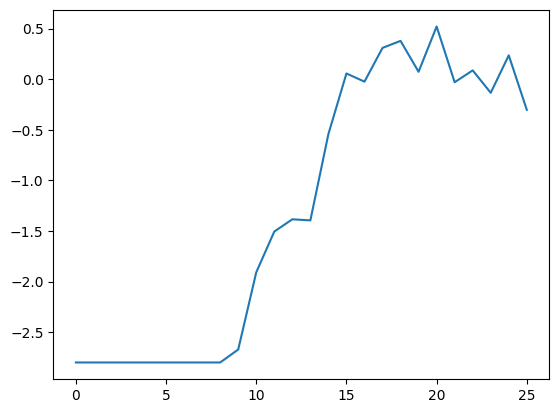

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data=np.array(df[0][1:])
import numpy as np

data = np.diff(data, axis=0)
# data = np.vstack((data[0], updated_arr))

plt.plot(data[:,2])
plt.show()

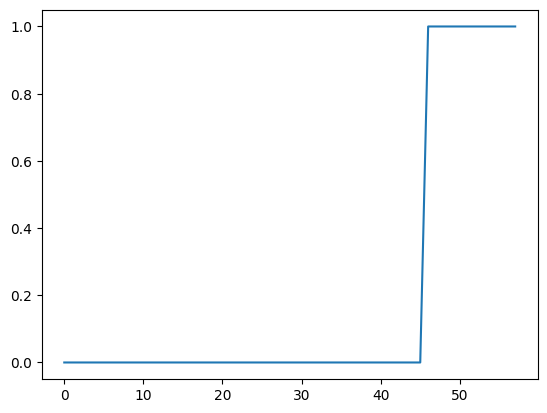

In [ ]:
import pickle
with open('../../tmp/000001.pkl','rb') as f:
    data=pickle.load(f)
actions = []
for frame in data['trajectory']:
    actions.append(frame['action'])
actions = np.array(actions)
plt.plot(actions[:,7])
plt.show()

In [ ]:
data['trajectory']

[{'img': array([[[0.88627451, 0.89019608, 0.89803922],
          [0.9372549 , 0.94117647, 0.94117647],
          [0.89411765, 0.89803922, 0.89803922],
          ...,
          [0.68627451, 0.69803922, 0.72156863],
          [0.78823529, 0.79607843, 0.80784314],
          [0.84313725, 0.85098039, 0.85882353]],
  
         [[0.78039216, 0.78823529, 0.81176471],
          [0.8627451 , 0.8627451 , 0.87058824],
          [0.9254902 , 0.92941176, 0.92941176],
          ...,
          [0.37647059, 0.40784314, 0.46666667],
          [0.68627451, 0.70196078, 0.7254902 ],
          [0.84705882, 0.85490196, 0.85882353]],
  
         [[0.52156863, 0.56078431, 0.63137255],
          [0.67843137, 0.69803922, 0.73333333],
          [0.81568627, 0.82352941, 0.83529412],
          ...,
          [0.23137255, 0.26666667, 0.33333333],
          [0.54117647, 0.56470588, 0.60392157],
          [0.84705882, 0.85098039, 0.85882353]],
  
         ...,
  
         [[0.74509804, 0.68235294, 0.55686275],
       

In [ ]:
data.files

['actions',
 'rel_actions',
 'robot_obs',
 'scene_obs',
 'rgb_static',
 'rgb_gripper',
 'rgb_tactile',
 'depth_static',
 'depth_gripper',
 'depth_tactile']

In [ ]:
data['actions']

array([-0.02706343, -0.07078591,  0.5760694 ,  3.07513196, -0.10462246,
        1.53198487,  1.        ])

In [ ]:
data['rel_actions']

array([ 0.58591552,  0.00457202,  0.02531723,  0.0278458 , -0.05213221,
       -0.47841364,  1.        ])